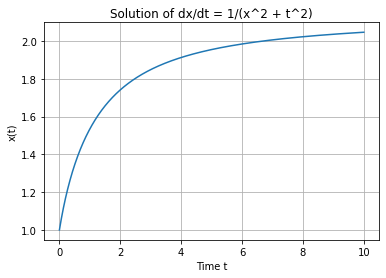

Estimated x at t = 10: 2.046212763560672


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, x0, t0, tf, n):
    dt = (tf - t0) / n
    t = np.linspace(t0, tf, n+1)
    x = np.zeros(n+1)
    x[0] = x0
    
    for i in range(n):
        k1 = dt * f(t[i], x[i])
        k2 = dt * f(t[i] + dt/2, x[i] + k1/2)
        k3 = dt * f(t[i] + dt/2, x[i] + k2/2)
        k4 = dt * f(t[i] + dt, x[i] + k3)
        x[i+1] = x[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, x

def dx_dt(t, x):
    return 1 / (x**2 + t**2)

x0 = 1
t0 = 0
tf = 10
n = 1000

t_values, x_values = rk4(dx_dt, x0, t0, tf, n)

plt.plot(t_values, x_values)
plt.title("Solution of dx/dt = 1/(x^2 + t^2)")
plt.xlabel("Time t")
plt.ylabel("x(t)")
plt.grid(True)
plt.show()

print("Estimated x at t = 10:", x_values[-1])

In [10]:
#TIME for 3.5e6

def rk4_step(f, t, x, h):
    k1 = h * f(t, x)
    k2 = h * f(t + 0.5 * h, x + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, x + 0.5 * k2)
    k4 = h * f(t + h, x + k3)
    return x + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_ivp_rk4(f, x0, t0, tf, h):
    t = t0
    x = x0
    while t < tf:
        if t + h > tf:
            h = tf - t  # Adjust the last step to reach exactly tf
        x = rk4_step(f, t, x, h)
        t += h
    return x

tf = 3.5e6
h = 100  # Large step size due to very large domain

# Solve the IVP using the RK4 method
x_final = solve_ivp_rk4(dx_dt, x0, t0, tf, h)

print(f"Estimated value of x at t = {tf}: {x_final}")

Estimated value of x at t = 3500000.0: 17.698136384431663
